# 2. Preliminaries: quantum states, channels and dynamical maps, and circuit design <a id='preliminaries'></a>

## Contents
2. [Preliminaries: quantum states, channels and dynamical maps](#preliminaries)
 1. [The structure of quantum states](#states)
         - [Example 1](#ex1)
         - [Exercise 2.1.1](#exercise211)
 2. [Positive and completely positive maps](#maps)
         - [Example 2](#ex2)
         - [Exercise 2.2.1](#exercise221)
         - [Example 3](#ex3)
 3. [How to describe quantum evolution](#evolution)
 4. [General considerations for circuit implementation and Qiskit tools](#gencon)
    1. [Circuit design and implementation on IBM Q Experience processors](#cirdesign)
    2. [Noise mitigation](#noise)
    3. [Quantum state tomography](#tom)
       - [Exercise 2.4.1](#exercise241)
       
  [References](#ref)

$\newcommand{\Mn}{M_n(\mathbb{C})}$
$\newcommand{\Mq}{M_2(\mathbb{C})}$
$\newcommand{\Mk}{M_k(\mathbb{C})}$
$\newcommand{\Mm}{M_m(\mathbb{C})}$
$\newcommand{\Mnm}{M_{n \times m}(\mathbb{C})}$
$\newcommand{\Mnp}{M_n^+(\mathbb{C})}$
$\newcommand{\ra}{\,\rightarrow\,}$
$\newcommand{\id}{\mbox{id} }$
$\newcommand{\ot}{ {\,\otimes\,} }$
$\newcommand{\Cd}{ {\mathbb{C}^d} }$
$\newcommand{\Rn}{ {\mathbb{R}^n} }$

This section closely follows Dariusz Chruściński's Lecture Notes presented at the school "Open Quantum Systems", Torun, June 20-24, 2012 and published as [*On time-local generators of quantum evolution*, Open Syst. Inf. Dyn. **21**, 1440004 (2014)](https://doi.org/10.1142/S1230161214400046).

We begin by introducing basic notation and terminology.

## 2.1. The structure of quantum states <a id='states'></a>

As we discussed in **[Chapter 1](introdction.html)**, only pure states can be represented as vectors in Hilbert space, but that does not apply to all physically possible states. As an example, consider the situation depicted in the following figure.

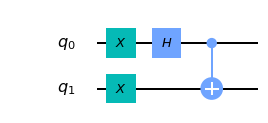

In [5]:
# Quantum register
q = QuantumRegister(2, name='q')

# Quantum circuit
bell = QuantumCircuit(q)

# Create a Bell state
bell.x(q[0])
bell.x(q[1])
bell.h(q[0])
bell.cx(q[0], q[1])

# Draw circuit
bell.draw(output = 'mpl')

The state of the two qubits in the circuit is the Bell state $| \psi^- \rangle = \frac{1}{\sqrt{2} } \left( |01\rangle - |10\rangle \right)$, which is maximally entangled. If we were to describe the state of either of the two qubits alone, no single vector in their corresponding Hilbert spaces would faithfully characterize it. Indeed, it is easy to see that, regardless of which single-qubit unitary we apply to e.g. $q_0$, the probability of its measurement yielding zero is $1/2$, contrarily to the predictions for any pure state $\alpha |0 \rangle + \beta | 1 \rangle$. Instead, these probabilities are consistent with the situation in which one tosses a fair coin and prepares the qubit in states $|0\rangle$ or $|1\rangle$ depending on the outcome. In fact, *any* quantum state can be represented as such statistical mixture.

Mathematically, statistical mixtures are represented by density operators. From any pure state $| \psi \rangle$, one can construct the corresponding projection operator $| \psi \rangle \langle \psi |$, which promotes the mathematical description of the state from vector to operator, but is otherwise equivalent. The reason why using operators becomes essential is that they admit a *convex sum*, that is, the operator $p_1 | \psi_1 \rangle \langle \psi_1 | + p_2 | \psi_2 \rangle \langle \psi_2 |$ results in a physical state if $p_1 + p_2 = 1$ and $| \psi_1 \rangle$, $| \psi_2 \rangle$ are normalized. Therefore, they can accomodate statistical mixtures of states in a very natural way. As a final remark, one usually finds the terms density matrix and density operator. While density matrix in principle refers to the matrix representing the density operator in some particular basis, it is common to use both terms indistinctly.

Now, let us define the concept formally. Consider a quantum system living in a finite-dimensional Hilbert space $\mathcal{H}$ isomorphic to $\mathbb{C}^n$. Fixing an orthonormal basis $\{e_1,\ldots,e_n\}$ in $\mathcal{H}$ any linear operator in $\mathcal{H}$ may be identified with an $n \times n$ complex matrix, i.e. an element from $M_n(\mathbb{C})$.  A mixed state of such system is represented by a density matrix, i.e. a matrix $\rho$ from $ M_n(\mathbb{C})$ such that $\,  \rho \geq 0$ (that is, it has real non-negative eigenvalues) and  ${\rm Tr}\, \rho=1$. The space of states $\mathfrak{S}_n$ of the $n$-level quantum system defines an $(n^2-1)$-dimensional convex set.  Pure states correspond to rank-1 projectors $|\psi \rangle \langle \psi|$ and define extremal elements of $\mathfrak{S}_n$. Any mixed state $\rho$ can be decomposed as

\begin{equation}
    \rho  = \sum_k w_k |\psi_k \rangle \langle \psi_k| \ ,
\tag{2.1}    
\end{equation}

with $w_k > 0$ and $\sum_k w_k =1$, i.e. $w_k$ provides a probability distribution. It should be stressed that the above decomposition is highly non-unique.

To illustrate the concept of density operator let us consider the following example.

### Example 1 <a id='ex1'></a>

> A 2-level system (qubit) living in $\mathbb{C}^2$. Any hermitian operator $\rho$ may be decomposed as follows
> 
> \begin{equation}
    \rho = \frac 12 ( \mathbb{I}_2 + \sum_{k=1}^3 x_k \sigma_k) \ ,
\tag{2.2}
\end{equation}
> 
> where $\mathbf{x}=(x_1,x_2,x_3) \in \mathbb{R}^3$ and $\{\sigma_1,\sigma_2,\sigma_3\}$ are Pauli matrices. As usual $\mathbb{I}_n$ denotes the unit matrix in $M_n(\mathbb{C})$. It is, therefore, clear that $\rho$ is entirely characterized by the Bloch vector $\mathbf{x}$.
This representation already guaranties that ${\rm Tr}\, \rho=1$. Hence, $\rho$ represents a density operator if and only if the corresponding eigenvalues $\{\lambda_-,\lambda_+\}$ are non-negative. One easily finds
> 
> \begin{equation}\label{}
    \lambda_- = \frac 12 (1 - |\mathbf{x}|) \ , \ \ \  \lambda_+ = \frac 12 (1 + |\mathbf{x}|) \ ,
\tag{2.3}
\end{equation}
> 
> and hence $\rho \geq 0$ if and only if $|\mathbf{x}|=\sqrt{x_1^2 + x_2^2 + x_3^2} \leq 1$. This condition defines a unit ball in $\mathbb{R}^3$ known as a Bloch ball. A state is pure if $\rho$ defines a rank-1 projector, i.e. $\lambda_-=0$ and $\lambda_+=1$. This shows that pure states belong to Bloch sphere corresponding to $|\mathbf{x}|=1$. Unfortunately, this simple geometric picture is much more complicated if $n >2$.

For any $A \in M_n(\mathbb{C})$ we denote by $||A||_1 := {\rm Tr} |A|  = {\rm Tr}\sqrt{AA^\dagger}$ the trace-norm of $A$. If $\lambda_1,\ldots\lambda_n$ are the (necessarily nonnegative) eigenvalues of $AA^\dagger$, then
$$   ||A||_1 = \sqrt{\lambda_1} + \ldots + \sqrt{\lambda_n} \ . $$

The space of states $\mathfrak{S}_n$ is equipped with a natural metric structure: given two states $\rho,\sigma \in \mathfrak{S}_n$ one defines the corresponding distance

\begin{equation}
    D[\rho,\sigma] = \frac 12 \,||\rho - \sigma||_1\ .
\tag{2.4}
\end{equation}

This quantity  measures distinguishability between $\rho$ and $\sigma$. It is clear that $D[\rho,\sigma] =0$, i.e. $\rho$ and $\sigma$ are indistinguishable, if and only if $\rho=\sigma$. Note, that if $\rho$ and $\sigma$ are orthogonally supported, then
$$ D[\rho,\sigma] = \frac 12 ( ||\rho||_1 + ||\sigma||_1) = 1\ , $$
since $||\rho||_1=1$ for any density matrix $\rho$. In this case $\rho$ and $\sigma$ are perfectly distinguishable. Hence

\begin{equation}
    0 \leq D[\rho,\sigma] \leq 1\ .
\tag{2.5}    
\end{equation}

In particular, if $\rho$ and $\sigma$ are two states of a qubit and $\mathbf{x}$ and $\mathbf{y}$ are corresponding Bloch vectors then

\begin{equation}
    D[\rho,\sigma] = \frac 12 \, |\mathbf{x} - \mathbf{y}|  \ ,
\tag{2.6}
\end{equation}

reproduces the standard Euclidean distance in $\mathbb{R}^3$.  For more information about the structure of quantum states see [7,8].

When considering multipartite systems, one often needs to calculate the reduced state of some of its parts. This is done via the so-called partial trace. Suppose that we have a bipartite state, with parts $A$ and $B$, in a joint state $\rho_{AB}$. The state $\rho_A$ of part $A$ is obtained by tracing out over $B$'s degrees of freedom,
\begin{equation}
\rho_A = \mathrm{Tr}_{B} \left(\rho_{AB}\right) = \sum\limits_{i=1}^{D} \langle i | \rho_{AB} | i \rangle,
\end{equation}
where $\left\lbrace | i \rangle \right\rbrace$ is any orthogonal basis of $B$'s Hilbert space and $D$ is its dimension.

### Exercise 2.1.1 <a id='exercise211'></a>

Consider the following circuit

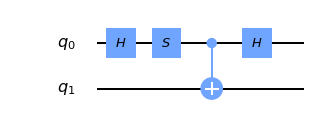

In [6]:
# Quantum register
q = QuantumRegister(2, name='q')

# Quantum circuit
entangled = QuantumCircuit(q)

# Entangled state
entangled.h(q[0])
entangled.s(q[0])
entangled.cx(q[0], q[1])
entangled.h(q[0])

# Draw circuit
entangled.draw(output='mpl')

1. Write the resulting two-qubit quantum state $\rho_{q_0,q_1} = | \psi \rangle \langle \psi |$.
2. Compute the partial trace to obtain the reduced density matrix $\rho_{q_0}$ of $q_0$.
3. Determine the Bloch vector $\mathbf{x}$ of $\rho_{q_0}$.

## 2.2. Positive and completely positive maps <a id='maps'></a>

In many situations, one needs to describe the change of the state of the system, for instance, when studying temporal evolution or to characterize the effect of a measurement. The general (linear) mathematical object used to map operators into operators is called a *map*. However, not all maps map density operators (aka states) into density operators. A map which does is called a *quantum channel*. Notice that a channel need not be a unitary transformation in general, but can map a pure state into a statistical mixture. For example, consider the following circuit, which implements a channel on qubit $q_0$.

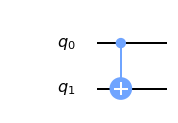

In [7]:
# Quantum register
q = QuantumRegister(2, name='q')

# Quantum circuit
channel = QuantumCircuit(q)

# CNOT gate
channel.cx(q[0], q[1])

# Draw circuit
channel.draw(output='mpl')

If the initial state of $q_0$ is pure and in a coherent superposition of $|0\rangle$ and $|1\rangle$, the resulting state will no longer be pure.

The requirements for a map to be a channel must obviously include the preservation of Hermiticity, positivity and the trace, since a state must have real-valued non-negative eigenvalues adding up to one. However, as we will see in what follows, there is a less obvious requirement that any channel must fulfil: *complete positivity*.

Consider a linear map $\Phi : M_n(\mathbb{C}) \rightarrow M_n(\mathbb{C})$ and let  $M_n^+(\mathbb{C}) = \{ A \in M_n(\mathbb{C})\, |\, A\geq 0 \} \subset M_n(\mathbb{C})$ be a convex subset of positive matrices. One calls a linear map $\Phi$


- Hermicity-preserving  iff $\Phi(A^\dagger) = [\Phi(A)]^\dagger$,
- positive iff $\Phi(M_n^+(\mathbb{C}))\subset M_n^+(\mathbb{C})$,
- trace-preserving iff ${\rm Tr}\, \Phi(A) = {\rm Tr}\, A$,
- unital iff $\Phi(\mathbb{I}_n) = \mathbb{I}_n$.

It is easy to show that a positive map is necessarily Hermicity-preserving. Moreover, observing that $\mathfrak{S}_n = \{ A\in \Mnp\, |\ {\rm Tr}\, A=1\}$, it is clear that if $\Phi$ is positive and trace preserving then it maps density matrices into density matrices, i.e. $\Phi(\mathfrak{S}_n) \subset \mathfrak{S}_n$. If $\Phi$ is a linear map then one defines a dual map $\Phi^* : \Mn \ra \Mn$ by

\begin{equation}
    {\rm Tr}[A \Phi^*(B)] = {\rm Tr}[\Phi(A)B]\ ,
\tag{2.7}
\end{equation}

for all $A,B\in \Mn$. $\Phi$ is trace-preserving iff $\Phi^*$ is unital [[1](#1)-[3](#3)].

### Example 2 <a id='ex2'></a>

> Consider a transposition $T_n : M_n(\mathbb{C})\ra \Mn$, i.e. $T_n(\rho) = \rho^T$. Since transposition does not affect the spectrum of $A$ it is clear that $A^T \geq 0$ whenever $A\geq 0$. Note that $T_n$ is trace-preserving and unital.

Positive trace-preserving maps possess the following fundamental property

**Proposition 1 ([[1](#1)-[3](#3)])**

> If $\Phi$ is positive and trace-preserving, then
> 
> \begin{equation}
    || \Phi(X)||_1 \leq ||X||_1\ ,
\tag{2.8}
\end{equation}
> 
> for all $X \in \Mn$, that is, $\Phi$ is a contraction in trace-norm. Hence
> 
> \begin{equation}
    D[\Phi(\rho),\Phi(\sigma)] \leq D[\rho,\sigma]\ ,
\tag{2.9}
\end{equation}
> 
> which means that the distinguishability of $\rho$ and $\sigma$ never increases under the action of a positive and trace-preserving map.

It turns out that the positivity property is not sufficient to describe the dynamics of open quantum systems. The reason stems from the properties of composed systems. Composing two systems living in  $\mathcal{H}_1$ and $\mathcal{H}_2$, respectively, one obtains a system living in $\mathcal{H}=\mathcal{H}_1 \ot \mathcal{H}_2$. Let ${\rm dim}\, \mathcal{H}_1 = n$,  ${\rm dim}\, \mathcal{H}_2 = m$ and consider two linear maps
$$ \Phi_1 : \Mn \ra  \Mn\ , \ \ \ \ \Phi_2 : \Mm \ra  \Mm\ \ . $$

Recalling that $\Mnm = \Mn \ot \Mm$ one defines a tensor product

$$ \Phi_1 \ot \Phi_2 : \Mnm \ra  \Mnm\ ,$$

as follows: for a fixed  orthonormal basis $\{e_1,\ldots,e_n\}$ in $\mathcal{H}_1$ let us define $e_{ij} := |e_i \rangle \langle e_j| \in \Mn$. Elements $\{e_{ij}\}$ for $i,j=1,\ldots,n$ define an orthonormal basis in $\Mn$ with respect to the standard inner product $(A,B) = {\rm tr}(A^\dagger B)$. Now, any matrix $A \in \Mnm$ may be represented in the following block form
\begin{equation}
    A = \sum_{i,j=1}^n e_{ij} \ot A_{ij}\ ,
\tag{2.10}
\end{equation}
with $A_{ij} \in \Mm$. For example if $n=2$ one has
\begin{equation}
    A = \sum_{i,j=1}^2 e_{ij} \ot A_{ij} = \left( \begin{array}{c|c} A_{11} & A_{12} \\ \hline A_{21} & A_{22} \end{array} \right)\ .
\tag{2.11}
\end{equation}

Hence the action of $\Phi_1 \ot \Phi_2$ is given by
\begin{equation}
    [\Phi_1 \ot \Phi_2](A) := \sum_{i,j=1}^n \Phi_1(e_{ij}) \ot \Phi_2(A_{ij})\ .
\tag{2.12}
\end{equation}

In particular if $n=2$ and $\Phi_1 = \mathbb{1}_2$, where $\mathbb{1}_n : \Mn \ra \Mn$ denotes an identity map defined by $\mathbb{1}_n(X) = X$, then

\begin{equation}
   [\mathbb{1}_2 \ot \Phi](A) = \sum_{i,j=1}^2 e_{ij} \ot \Phi(A_{ij}) = \left( \begin{array}{c|c} \Phi(A_{11}) & \Phi(A_{12}) \\ \hline \Phi(A_{21}) & \Phi(A_{22}) \end{array} \right) \ .
\tag{2.13}
\end{equation}

Now comes a surprise: even if $\Phi_1$ and $\Phi_2$ are positive $\Phi_1 \ot \Phi_2$ need not be a positive map.

### Example 3 <a id='ex3'></a>

> Interestingly, the transposition map considered in **Example 2** loses its positivity when tensored with  another positive map. This map is evidently positive and trace-preserving. Consider $\mathbb{1}_2 \ot T_2$. It turns out that this maps is not positive in $M_4(\mathbb{C})$. Indeed, let
> 
> \begin{equation}\label{}
     P^+_2 = \frac 12 \sum_{i,j=1}^2 e_{ij} \ot e_{ij} = \frac 12 \left( \begin{array}{cc|cc} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ \hline   0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \end{array} \right) \ ,
\tag{2.14}
\end{equation}
> 
> be a state in $\mathbb{C}^2 \ot \mathbb{C}^2$. Note that $P^+_2 = |\psi^+_2 \rangle \langle \psi^+_2|$ with $\psi^+_2 = (e_1 \ot e_1 + e_2 \ot e_2)/\sqrt{2}$ being one of the well-known Bell states of two qubits. One finds
> 
> \begin{equation}\label{}
    [\mathbb{1}_2 \ot T_2]( P^+_2) = \frac 12 \sum_{i,j=1}^2 e_{ij} \ot e_{ji} = \frac 12 \left( \begin{array}{cc|cc} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ \hline   0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{array} \right) \ ,
\tag{2.15}
\end{equation}
> 
> Note that $[\mathbb{1}_2 \ot T_2]( P^+_2)$ has one negative eigenvalue and hence it is not a positive map.

This example proves that  quantum physics of composed systems  needs a more refined notion of positivity.  Consider again a linear map $\Phi : \Mn \ra \Mn$. One calls $\Phi$ $k$-positive if

\begin{equation}
\mathbb{1}_k \ot \Phi : \Mk \ot \Mn \ra \Mk \ot \Mn \ ,
\tag{2.16}
\end{equation}

is positive. Clearly 1-positive is just positive and $k$-positivity implies $\ell$-positivity for $\ell < k$. Finally, $\Phi$ is called **_completely positive (CP)_** if it is $k$-positive for $k=1,2,\ldots$.

Interestingly, one has the following characterization:

**Proposition 2 (Choi [[4](#4)])**

> If ${\rm dim}\, \mathcal{H} = n$, then $\Phi$ is CP if and only if $\Phi$ is $n$-positive.

Denoting by $\mathcal{P}_k$ a convex set of $k$-positive maps one has the following chain of inclusions

\begin{equation}
    {\rm CP} \equiv \mathcal{P}_n \subset \ldots \subset \mathcal{P}_2 \subset \mathcal{P}_1 \equiv {\rm Positive\ maps} \ .
\end{equation}

Let $\{e_1,\ldots,e_n\}$ be a fixed orthonormal basis in $\mathcal{H}$ and let
\begin{equation}
 |\psi^+_n \rangle = \frac{1}{\sqrt{n} }\, \sum_{k=1}^n e_k \ot e_k\ ,
\tag{2.17}
\end{equation}

denote a maximally entangled state in $\mathcal{H} \ot \mathcal{H}$. Moreover,  let $P^+_n = |\psi^+_n \rangle \langle \psi^+_n|$ denote the corresponding rank-1 projector.

**Proposition 3 (Choi [[4](#4)])**

> $\Phi$ is CP if and only if $[\mathbb{1}_n \ot \Phi](P^+_n) \geq 0$.

This beautiful result states that in order to prove that $\Phi$ is CP, or equivalently that $\mathbb{1}_n \ot \Phi$ is positive, it is enough to check whether $\mathbb{1}_n \ot \Phi$ is positive on one particular projector $P^+_n$. Positivity of $[\mathbb{1}_n \ot \Phi](P^+_n)$ guaranties that $[\mathbb{1}_n \ot \Phi](X) \geq 0$ for all positive $X \in \Mn \ot \Mn$.

**Corollary 1**

> If $\Phi_1$ and $\Phi_2$ are CP maps, then $\Phi_1 \ot \Phi_2$ is always CP as well.

This analysis shows that the motivation to use CP maps is deeply rooted in physics and it is not just a mathematical trick! The very presence of quantum entangled states enforces us to use maps which are not only positive but also completely positive. The following result provides the most important characterization of CP maps.

**Theorem 1 (Kraus form [[1](#1), [2](#2), [4](#4), [5](#5)])**

> A map $\Phi : \Mn \ra \Mn$ is CP if and only if
> 
> \begin{equation} \label{Kraus}
\Phi(X) = \sum_\alpha\, K_\alpha X\, K_\alpha^\dagger\ ,
\tag{2.18}
\end{equation}
> for $X \in M_n(\mathbb{C})$.

Formula ([2.18](#mjx-eqn-Kraus)) is usually called the **_Kraus_** or **_Operator Sum Representation_** of $\Phi$ and $K_\alpha$ are called Kraus operators. Actually, the above formula  appeared already in the Sudarshan et. al. paper [[6](#6)]. It should be stressed that the Kraus representation is highly non unique. A completely positive trace preserving map (CPTP) is called a **_quantum channel_**. A CP map possessing a Kraus representation is trace-preserving iff

\begin{equation}
 \sum_\alpha\, K_\alpha^\dagger \, K_\alpha = \mathbb{I}_n\ .
\tag{2.19}
\end{equation}

The following result shows the origin of a genuine quantum channel.

**Theorem 2 (Unitary dilation)**

> Any quantum channel $\Phi$ may be constructed as follows
> 
> \begin{equation}
    \Phi(\rho) = {\rm Tr}_E \big[ U (\rho \ot \omega) U^\dagger \big]\ ,
\label{200}
\tag{2.20}
\end{equation}
> 
> where $U$ is a unitary operator in $\mathcal{H}\ot \mathcal{H}_E$, $\omega$ is a density operator in $\mathcal{H}_E$, and ${\rm Tr}_E$ denotes the partial trace over $\mathcal{H}_E$.

One usually interprets $\mathcal{H}_E$ as a Hilbert space of the environment and $\omega$ as its fixed state.
Let

$$ \omega |E_k \rangle =  \lambda_k |E_k \rangle\  , $$

with $\lambda_k \geq 0$.  Moreover,  let $U = \sum_{k,l} U_{kl} \ot |E_k\rangle \langle E_l|$. Formula ([2.20](#mjx-eqn-200)) implies

\begin{eqnarray*}
    \Phi(\rho) &=& \sum_{m,n} \sum_{i,j} \sum_k \lambda_k \, {\rm Tr}_E \big[ (U_{ij} \ot |E_i \rangle \langle E_j|)  (\rho \ot |E_k \rangle \langle E_k|) (U_{mn}^\dagger \ot |E_n \rangle \langle E_m|) \big] \nonumber \\ &=& \sum_{m,n} \sum_{i,j} \sum_k \lambda_k \, {\rm Tr} [ |E_i \rangle \langle E_j|E_k \rangle \langle E_k|E_n \rangle \langle E_m|]\, U_{ij} \rho U_{mn}^\dagger \ .
\end{eqnarray*}

Using ${\rm Tr} [ |E_i \rangle \langle E_j|E_k \rangle \langle E_k|E_n \rangle \langle E_m| ] = \delta_{im} \delta_{jk} \delta_{kn}$ and introducing $K_\alpha := K_{mn} = \sqrt{\lambda_n}\, U_{mn}$ one arrives at the Kraus representation $\Phi(\rho) = \sum_\alpha\, K_\alpha \rho\, K_\alpha^\dagger$ which proves that $\Phi$ defined *via* formula ([2.20](#mjx-eqn-200)) is completely positive. One easily proves that $\Phi$ is also trace preserving and hence defines a quantum channel.

It is worth stressing the importance of this last theorem for the digital simulation of OQS. It implies that *any* quantum channel can be simulated by using auxiliary degrees of freedom living in Hilbert space $\mathcal{H}_E$, preparing them in the appropriate state, and applying a unitary transformation to the total system. We will often use this strategy in our simulations, given that universal quantum computers are designed to apply only unitary transformations among the qubits.

### Exercise 2.2.1 <a id='exercise221'></a>

Consider the following circuit

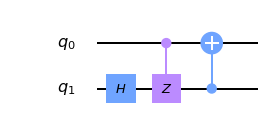

In [9]:
# Quantum register
q = QuantumRegister(2, name='q')

# Quantum circuit
channel = QuantumCircuit(q)

# CNOT gate
channel.h(q[1])
channel.cz(q[0], q[1])
channel.cx(q[1], q[0])

# Draw circuit
channel.draw(output='mpl')

1. Calculate the outcoming state of $q_0$ for the following incoming states: $\alpha |0\rangle + \beta |1\rangle$ with $|\alpha|^2 + |\beta|^2 = 1$, $p_1 |+ \rangle \langle +| + p_2 | - \rangle \langle - |$ with $p_1 + p_2 = 1$.
2. Verify that the channel is completely positive using proposition 2 (consider a third ancillary qubit $q_2$ maximally entangled with $q_0$).
3. Determine the Kraus representation of the channel.

## 2.3. How to describe quantum evolution <a id='evolution'></a>

If $\rho$ is an initial state of an $n$-level quantum system, then by its evolution we mean a trajectory $\rho_t$ for $t \geq 0$ starting at $\rho$. The simplest example of quantum evolution is provided by the von Neumann equation (in units of $\hbar$)

\begin{equation}\label{v-N}
    i\dot{\rho}_t = [H,\rho_t]\ ,
\tag{2.21}
\end{equation}

with the corresponding solution

\begin{equation}\label{}
    \rho_t = \mathcal{U}_t (\rho)\ ,
\tag{2.22}
\end{equation}

where the map $\mathcal{U}_t : \Mn \ra \Mn$ is defined by
\begin{equation}\label{UUU}
    \mathcal{U}_t(\rho) := U_t \rho U_t^\dagger\ ,
\tag{2.23}
\end{equation}

with $U_t = e^{-iHt}$. Note that ([2.23](#mjx-eqn-UUU)) defines a family of quantum channels. 

Let us observe that the 1-parameter unitary group $U_t$ implies the following composition law

\begin{equation}\label{U-t-s}
    \mathcal{U}_t \, \mathcal{U}_s = \mathcal{U}_{t+s}\ ,
\tag{2.24}
\end{equation}

for all $t,s \in \mathbb{R}$. Hence $\mathcal{U}_t$ defines a 1-parameter group of CP maps.

Equation ([2.21](#mjx-eqn-v-N)) may be transformed into the following equation for $\mathcal{U}_t$

\begin{equation}\label{v-N-U}
    \dot{\mathcal{U} }_t  = L \,\mathcal{U}_t\ , \ \ \ \mathcal{U}_0 = \mathbb{1}\ ,
\tag{2.25}
\end{equation}

where the generator $L : \Mn \ra \Mn$ is defined by

\begin{equation}\label{}
L(X) = -i [H,X]\ ,
\tag{2.26}
\end{equation}
for any $X \in \Mn$.

Now come the natural questions:

1. how to generalize the unitary evolution defined by ([2.23](#mjx-eqn-UUU)), valid for closed systems, to open quantum systems? 

2. how to generalize the corresponding equation of motion ([2.25](#mjx-eqn-v-N-U))?


**Definition 1**

> By a general quantum evolution we mean a dynamical map, i.e. a family of quantum channels $\Lambda_t : \Mn \ra \Mn$ for $t \geq 0$ such that $\Lambda_0 = \mathbb{1}_n$.

A dynamical map $\Lambda_t$ maps an initial state $\rho$ into a current state $\rho_t := \Lambda_t(\rho)$ and hence provides the natural generalization of the unitary evolution $\rho_t = \mathcal{U}_t(\rho)$. Assuming that $\rho_t$ satisfies a linear equation and that the initial state $\rho$ provides all necessary information to uniquely determine $\rho_t$ we expect that $\rho_t$ satisfies the following equation

\begin{equation}\label{}
    \dot{\rho}_t = L_t(\rho_t)\ ,
\tag{2.27}
\end{equation}

or equivalently

\begin{equation}\label{ME}
    \dot{\Lambda}_t = L_t\Lambda_t\ ,\ \ \ \Lambda_0 = \mathbb{1}_n\ ,
\tag{2.28}
\end{equation}

where $L_t : \Mn \ra \Mn$ denotes a time-dependent generator. This equation provides a natural generalization of ([2.25](#mjx-eqn-v-N-U)).

The formal solution of ([2.28](#mjx-eqn-ME)) may be written as follows
\begin{equation}\label{Lambda-t}
    \Lambda_t = {\rm T} \exp\left( \int_0^t L_\tau\, d\tau\right)\ ,
\tag{2.29}
\end{equation}

where T denotes the chronological ordering operator. The above formula is defined by the following Dyson series

\begin{equation}\label{Dyson}
    \Lambda_t = \mathbb{1}_n + \int_0^t dt_1\,  L_{t_1} + \int_0^{t} dt_1 \int_0^{t_1} dt_2 \,  L_{t_1} \,  L_{t_2} + \ldots \ ,
\tag{2.30}
\end{equation}
provided that it converges.

## 2.4. General considerations for circuit implementation and Qiskit tools <a id='gencon'></a>

### 2.4.1. Circuit design and implementation on IBM Q Experience processors <a id='cirdesign'></a>

In this section, we will briefly discuss the main aspects to take into account when designing a circuit to be implemented on a real device from the IBM Q Experience in order to reduce the noise in the experiment. As we introduced in **[Chapter 1](introduction.html)** and briefly again in the discussion of the *dilation theorem*, the general strategy consists in using some qubits to play the role of the system and other qubits for the environment and then applying the appropriate unitary gates among them to simulate the dynamics. In fact, we will even use extra ancillary qubits to quantify some dynamical properties of some dynamical evolutions in **[Chapter 7](jaynes_cummings_with_losses.html)**. In any case, there are many choices for the roles of the qubits, as well as of unitaries, that would be equivalent in principle. However, due to the noisy nature of the current NISQ devices, not all of them yield equally good results.

Given the large number of experimental runs allowed by the devices ($N = 8192$), the errors due to statistical fluctuations, of order $\mathcal{O}(1/\sqrt{N}) \approx 0.011$, are generally far less significant than other sources of error. The discrepancy between the experimental points and the theoretical predictions, on the other hand, often come from systematic errors induced by various factors in the hardware implementation. First, the qubits undergo relaxation and decoherence due to external noise. This error becomes more relevant when increasing the depth of the circuit. As we add more gates, the circuit takes longer to run, hence being more susceptible to these effects. Second, the gates have errors due to cross-talk and unwanted interactions between qubits when addressing them with pulses. In particular, the error rate of CNOT gates is about 10 times larger than single-qubit unitaries. Finally, there is a readout error affecting the quantum measurement, although this can be mitigated to some extent, as we discuss later on. The error rates and noise parameters on IBM Q devices are characterized on a daily basis using randomized benchmarking techniques. Since there are various, interdependent sources of noise, modeling and predicting the deviations in the experimental data is a non-trivial matter, beyond the scope of this book. Let us discuss some general guidelines targeted at minimising the aforementioned inaccuracies.

Since the IBM Q Experience devices are universal quantum computers, they enable the implementation of any unitary transformation of their constituent qubits; once a quantum circuit is provided for its execution, it is compiled into an equivalent circuit involving only the machine's basis gates (that is, those realisable experimentally). However, if the circuit requires a multi-qubit gate among qubits that are not physically connected [[1](#1)], the corresponding gate will be replaced with a longer circuit in which the states are swapped to neighbouring qubits in the compiled circuit. Since every swap gate includes a minimum of three CNOT gates, and these introduce considerable noise to the execution, it is crucial to assign the relevant qubits involved in the simulation (e.g. system, environment and ancillae) to the machine's qubits so that the number of CNOT gates between
disconnected qubits is minimised. Furthermore, the devices are calibrated daily and the errors of the basis gates are reported. This information can also be taken into account in the qubit assignment, as using the CNOT gates with smaller errors is preferable. The figure below shows the connectivity layout of `ibmq_16_melbourne`, IBM Q's 14-qubit device.

<img src="images/layout.png">

In addition to the gate errors, the qubits' readout errors characterising the discrepancies between the qubit state and the measurement outcome probabilities are also provided. In the IBM Q Experience devices, there are considerable differences in the readout errors of the different qubits, so this information should also be taken into account in the qubit-assignment process: if possible, it is preferable to assign the system (and any auxiliary ancillae whose measurement is required) to low readout-error qubits, while qubits with large readout errors  can still be used to simulate the environment or other ancillae that need not be measured. In any case, Qiskit provides post-processing error-mitigation tools that generally improve the experimental
results under the package \texttt{ignis}. We will explain how to use it in the next subsection. 

<a id='1'></a> [1]: The basis gates for the IBM Q Experience devices include any single-qubit rotation, whereas the only
multi-qubit gates are CNOTs. Two qubits are connected in a given device if there is a basis CNOT between them. 

### 2.4.2 Noise mitigation <a id='noise'></a>

If we prepare a qubit in state e.g. $|0\rangle$ and measure it in a NISQ device, we will not obtain the outcome 0 with probability one due to imperfections in the measurement process. Nevertheless, Qiskit's `Ignis` provides a tool to mitigate these errors that is very easy to use.

The working principle is the following. We first prepare all possible computational-basis states $| 0\cdots 0 \rangle, | 0\cdots 1 \rangle, \ldots, | 1\cdots 1 \rangle$ and measure their corresponding outcome probabilities (notice that it is only necessary to include the qubits whose measurement outcomes are needed). Once these are known, they can be used to correct any other experimental result by finding, via likelihood maximization, the experimental outcome that is most congruent with the observed measurement deviations. All the data shown in the book have been mitigated as described above.

The snippet below contains an example of the code needed to use the noise mitigation tool.

In [67]:
from qiskit import IBMQ, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, plot_state_city

In [22]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
backend = IBMQ.get_provider().get_backend('ibmqx2')

State labels: ['00', '01', '10', '11']


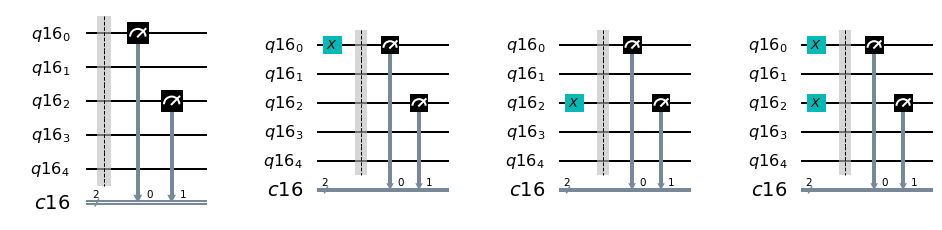

In [20]:
# qiskit-ignis provides tools for noise mitigation
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter, MeasurementFilter

# For visualizing the circuits
import matplotlib.pyplot as plt

# Suppose we have a 5-qubit quantum computer, and we want to perform measurements on qubits 0 and 2

# We first initialize a 5-qubit quantum register
q = QuantumRegister(5)

# Next, we generate the calibration circuits
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,2], qr=q)

# We can plot them 
fig, axes = plt.subplots(1, 4)
for i, circuit in enumerate(meas_calibs):
    circuit.draw(output='mpl', ax=axes[i], scale=2)
    
print("State labels:",state_labels)

In [25]:
# We now perform the calibration on the real device
job_calibration = execute(meas_calibs, backend=backend)
cal_results = job_calibration.result()

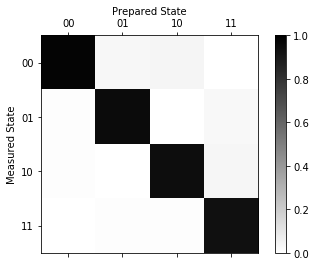

In [28]:
# We now calculate the calibration matrix from the outcomes
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

The element $(i, j)$ of the calibration matrix is the probability that the prepared state $j$ (columns) is measured to be in $i$ (rows). In a perfect, noiseless situation, it would be equal to the identity matrix.

In the real devices, we can see that, for example, there is a certain probability that the state $|01\rangle$ is actually measured to be $|00\rangle$.

In [30]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.953369


The calibration matrix is used for mitigating the measurement counts. Let's see it in action in an example where we generate a Bell state.

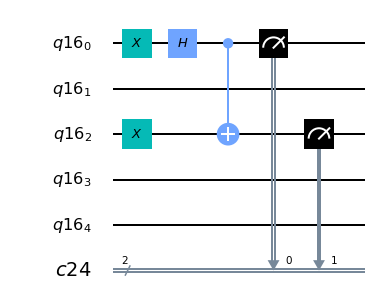

In [63]:
# Make a 2Q Bell state between Q0 and Q2
c = ClassicalRegister(2)
bell = QuantumCircuit(q)

bell.x(q[0])
bell.x(q[2])
bell.h(q[0])
bell.cx(q[0], q[2])

meas = QuantumCircuit(q, c)
meas.measure(q[0],c[0])
meas.measure(q[2],c[1])
qc = bell + meas

qc.draw(output='mpl')

In [55]:
# We execute the circuit
job = execute(qc, backend=backend, shots=5000)
results = job.result()

In [56]:
# We also simulate the circuit in a noiseless case
from qiskit import Aer
simjob = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=10000)
simresults = simjob.result()

In [57]:
# We get the raw counts
raw_counts = results.get_counts()
sim_counts = simresults.get_counts()

# ... and the mitigated counts
# First we need to get the measurement filter object
meas_filter = meas_fitter.filter
# and then we apply it to the results
mitigated_results = meas_filter.apply(results)
mitigated_counts = mitigated_results.get_counts(0)

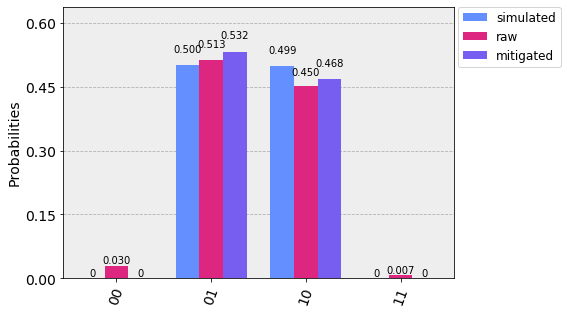

In [58]:
plot_histogram([sim_counts, raw_counts, mitigated_counts], legend=['simulated', 'raw', 'mitigated'])

We can see that, thanks to mitigation, spurious counts for the '00' and '11' states are filtered out. The counts for '01' and '10' are still deviating from the expected ones because of other sources of noise other than measurements (gate errors, decoherence...).

For more detailed information, please refer to the `qiskit` documentation and to the Ignis [measurement mitigation tutorial notebook](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/advanced/ignis/4_measurement_error_mitigation.ipynb).

### 2.4.3 Quantum state tomography <a id='tom'></a>

State tomography is the process of reconstructing the density operator of a quantum system by performing a set of measurements on identical preparations of its state. To be able to uniquely identify the state, the measurements must be **_tomographically complete_**, meaning that the measurement operators must form an operator basis on the Hilbert space of the system, so that full information of the state can be obtained.

State tomography is very useful for the characterization of devices, in particular for determining the actual state of qubits under the action of noise.

#### How does it work?
Since the Pauli matrices form a tomographically complete set of measurements, and they are natural choice of measurement operators for a digital quantum computer, we will focus on those.

Given a qubit in the state $\rho$, the expectation values of the Pauli matrices are given by

$$ \langle \sigma_i \rangle = \text{Tr}[\rho \sigma_i], \qquad i=1,2,3 $$

where we identify $\sigma_0 = \mathbb{I}$, $\sigma_1 = \sigma_x$, $\sigma_2 =\sigma_y$, and $\sigma_3 = \sigma_z$. 
By performing a large number of measurements of $\sigma_x$, $\sigma_y$, $\sigma_z$, one obtains an *estimate* of the expectation values of the operators, let's call them $\overline{\sigma_i}$ and could then write the density operator of the system as

$$ \rho = \frac 12 \left(\mathbb{I} + \sum_{i=1}^3 \overline{\sigma_i} \sigma_i \right).$$

This method would work if $\overline{\sigma_i} = \langle \sigma_i \rangle$, but, since this is not the case with a finite number of measurement shots, the equation above can give states that are not physical.

In order to obtain a physical density operator, a **_maximum-likelihood method_** is employed: among all possible density operators, the one that maximizes the probability to give $\overline{\sigma_i}$ as expectation values is chosen as the result of the tomography process.

For reconstructing a state of $n$ qubits, all possible combinations of the Pauli matrices $\sigma_{i_1} \otimes \ldots \otimes \sigma_{i_n}$ are needed, with $i_{j} = 0,\ldots,3$, meaning $3^n-1$ measurement (the case $\sigma_0 ^{\otimes n}$ doesn't need to be measured). 

`qiskit` implements the maximum-likelihood state tomography in the `qiskit-ignis` package. 
Here we will see an example with the Bell state prepared above

In [65]:
# We import the required classes from ignis.
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

from qiskit.tools.qi.qi import partial_trace

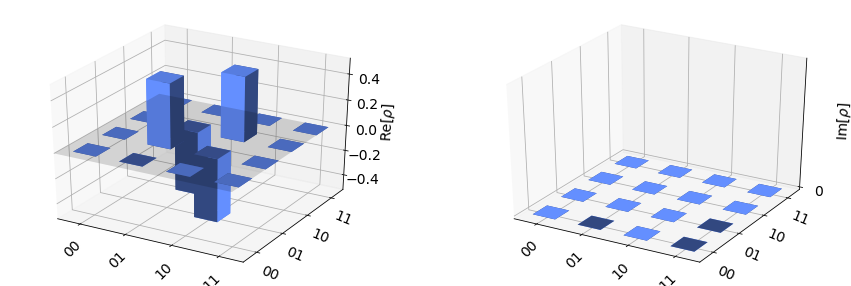

In [68]:
job_state_vec = execute(bell, Aer.get_backend('statevector_simulator'))
state_vec = partial_trace(job_state_vec.result().get_statevector(), [1, 3, 4])
plot_state_city(state_vec)

The bar plot above shows the real (left) and imaginary (right) parts of the density matrix of the Bell state. 
Now let's perform a two-qubit tomography on the real device

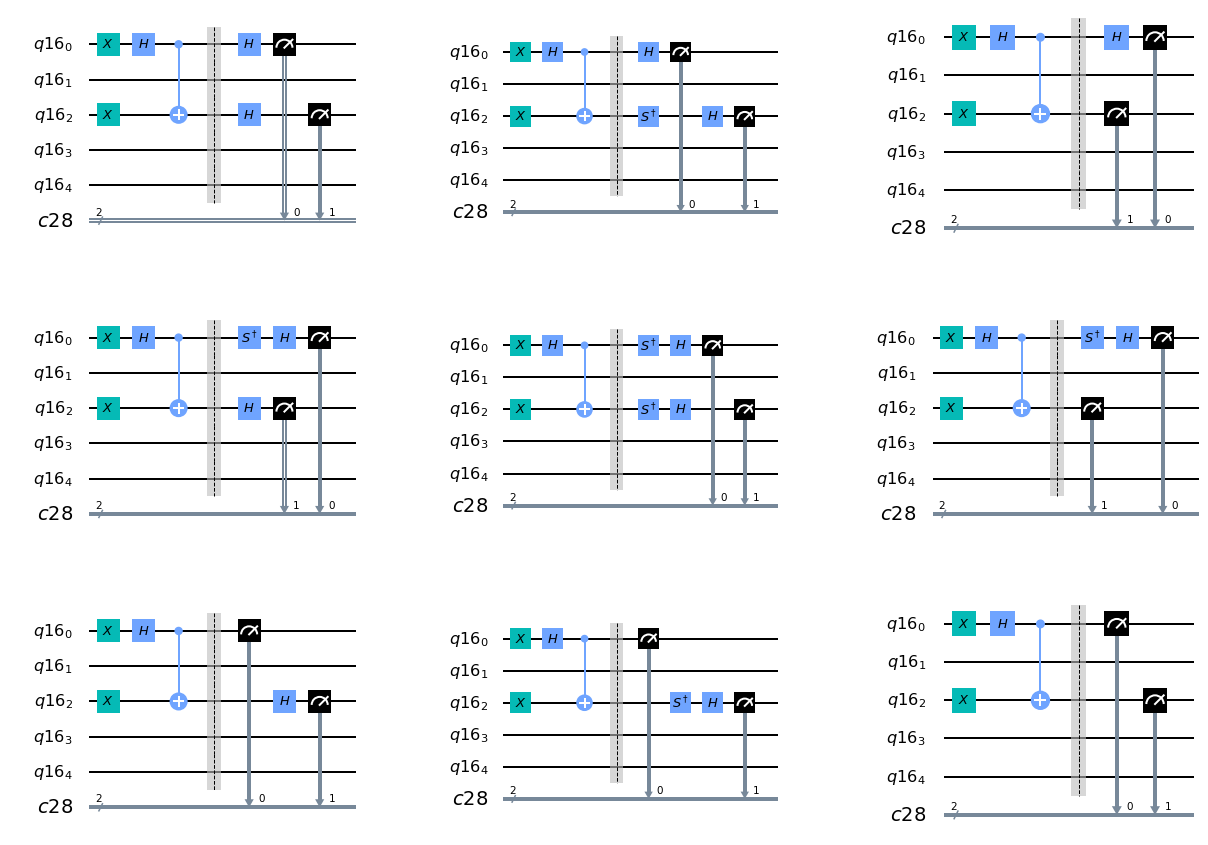

In [73]:
# We construct all the tomographic circuits
qst = state_tomography_circuits(bell, [q[0], q[2]])

# We can plot them
fig, axes = plt.subplots(3, 3)
for i, circuit in enumerate(qst):
    row = i // 3
    col = i % 3
    circuit.draw(output='mpl', ax=axes[row, col], scale=2)

In [74]:
# We execute the tomography circuits on the real device
job = execute(qst, backend=backend)

In [76]:
# We create a StateTomographyFitter from the job result and the tomography circuit
tomo_fitter = StateTomographyFitter(job.result(), qst)

# To obtain the 
rho_tomo = tomo_fitter.fit()

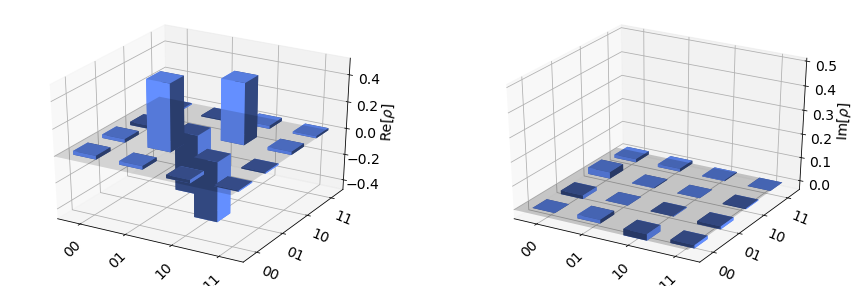

In [79]:
plot_state_city(rho_tomo)

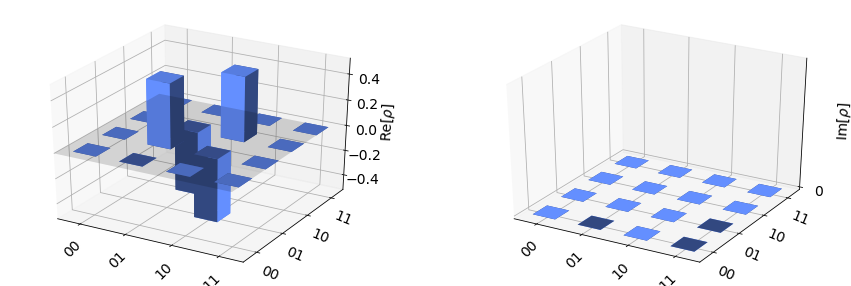

In [81]:
plot_state_city(state_vec)

### Exercise 2.4.1 <a id='exercise241'></a>

In order to measure quantitatively how "close" the experimental state tomography is to the expected state of the system, we can employ [quantum state fidelity](https://en.wikipedia.org/wiki/Fidelity_of_quantum_states):

$$ {\displaystyle F(\rho ,\sigma )=\left[\operatorname {Tr} {\sqrt { {\sqrt {\rho } }\sigma {\sqrt {\rho } }} }\right]^{2} }$$

The fidelity goes from one, in the case $\rho = \sigma$, to zero (when $\rho$ and $\sigma$ are orthogonal).
Qiskit contains an implementation of state fidelity.

> *TASKS:*
> 1. Measure the fidelity of `rho_tomo` to `state_vec`
> 2. Perform the state tomography after applying the measurement error mitigation. Is the fidelity higher?

In [83]:
# Import the state_fidelity function
from qiskit.quantum_info import state_fidelity

In [ ]:
# Exercise code:
# ...
# ...

## References <a id='ref'></a>

[1] [V. Paulsen, *Completely Bounded Maps and Operator Algebras*, Cambridge University Press, 2003](https://doi.org/10.1017/CBO9780511546631) <a id='1'></a>

[2] [R. V. Kadison and J. R. Ringrose, *Fundamentals of the theory of operator algebras*, vol I & II. Graduate Studies in Mathematics, American Mathematical Society, 1997](https://www.springer.com/gp/book/9781461277385) <a id='2'></a>

[3] [R. Bhatia, *Positive Deﬁnite Matrices*, Princeton University Press, 2006](https://press.princeton.edu/books/paperback/9780691168258/positive-definite-matrices) <a id='3'></a>

[4] [M.-D. Choi, Lin. Alg. Appl. **10**, 285 (1975)](https://doi.org/10.1016/0024-3795(75)90075-0) <a id='4'></a>

[5] [K. Kraus, *States, Eﬀects and Operations: Fundamental Notions of Quantum Theory*, Springer Verlag, 1983](https://doi.org/10.1007/3-540-12732-1)

[6] [E. C. G. Sudarshan, P. Mathews, and J. Rau, Phys. Rev. **121**, 920 (1961)](https://doi.org/10.1103/PhysRev.121.920)